- 차원 축소
    - 여러 특성을 더 적은 차원 (예: 2차원, 3차원, ..)으로 줄이기
    - 512 * 512 = 25000~ => 50~100개정도 차원 (손실이 생각보다 많이 없다.)
    - 시각화할때만 2차원으로 차원축소 -> 시각화

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets  import load_iris

plt.rcParams['font.family']='Malgun Gothic'

iris_data = load_iris()

iris_df = pd.DataFrame(
    data = iris_data.data,                     # iris 입력 특성 데이터
    columns=iris_data.feature_names           # 특성 이름
)

iris_df['target'] = iris_data.target    # 클래스 라벨 추가

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


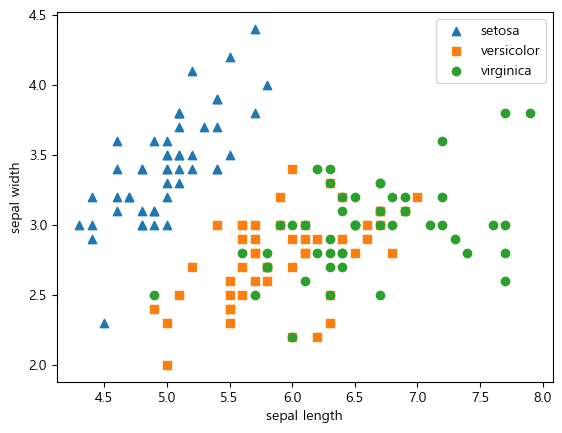

In [57]:
markers = ['^','s','o'] # 클래스별 마커 모양

for i, marker in enumerate(markers):
    x_data = iris_df[iris_data.target == i]['sepal length (cm)'] # 꽃받침 길이
    y_data = iris_df[iris_data.target == i]['sepal width (cm)']  # 꽃받침 너비
    plt.scatter(x_data, y_data, marker=marker, label=iris_data.target_names[i]) # 클래스별 산점도
    
    
plt.legend()                # 범례 표시
plt.xlabel('sepal length')  # x축 라벨
plt.ylabel('sepal width')   # y축 라벨
plt.show()

### 특성 2개만 확인했기 때문에 겹치는 데이터가 있다.

In [58]:
# 차원 축소 전 스케일링 진행
from sklearn. preprocessing import StandardScaler # 표준화 도구

scaler = StandardScaler()                                               # 스케일러 객체 생성
scaler.fit(iris_df.drop('target',axis=1))                               # 입력 특성 기준으로 평균/표준편차 학습
iris_scaled = scaler.transform(iris_df.drop('target', axis=1))          # 특성 데이터 표준화

iris_scaled


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [59]:
# PCA를 사용해서 4차원 특성 데이터를 2차원으로 축소 (중점 : 정보 손실을 최소화)
from sklearn.decomposition import PCA       # 주성분분석(PCA)

pca = PCA(n_components=2)                   # 2차원으로 축소
pca.fit(iris_scaled)                        # 주성분 학습
iris_pca = pca.transform(iris_scaled)       # 데이터 차원 축소

iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

### - 차원 축소 후 성능은 좋아질 수도 있고, 나빠질 수도 있다.
        - 좋아질 가능성이 더 놓을때는 차원이 엄청 많을때(예 : ~만개)
        - 나빠질 가능성이 더 높을때는 차원이 별로 없는데 차원축소를 진행하여 정보손실이 일어난 경우

In [60]:
irispca_df = pd.DataFrame(
    iris_pca,
    columns = ['pca_component_1', 'pca_component_2']  # PCA로 축소된 두 주성분
)
irispca_df['target'] = iris_data.target             # 클래스 라벨 추가

irispca_df

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


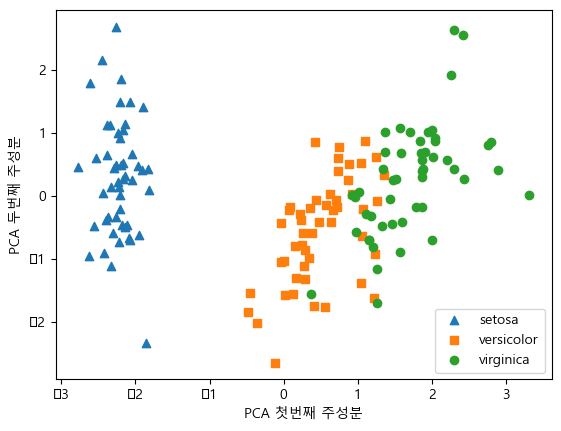

In [61]:
# 시각화
for i, marker in enumerate(markers):
    x_data = irispca_df[irispca_df['target']==i]['pca_component_1']                 # 첫 번째 주성분
    y_data = irispca_df[irispca_df['target']==i]['pca_component_2']                 # 두 번째 주성분
    plt.scatter(x_data, y_data, marker=marker, label=iris_data.target_names[i])     # 클래스별 산점도
    
plt.legend()
plt.xlabel('PCA 첫번째 주성분')
plt.ylabel('PCA 두번째 주성분')
plt.show()

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)                            # 2차원으로 축소
lda.fit(iris_scaled, iris_data.target) # 라벨 정보를 이용해서 학습
iris_lda = lda.transform(iris_scaled)  # LDA로 자원 축소

irislda_df = pd.DataFrame(
    iris_lda,
    columns=['lda_component_1', 'lda_component_2']
)

irislda_df['target'] = iris_data.target

irislda_df

,lda_component_1,lda_component_2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0
...,...,...,...
145,-5.645003,-1.677717,2
146,-5.179565,0.363475,2
147,-4.967741,-0.821141,2
148,-5.886145,-2.345091,2


c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


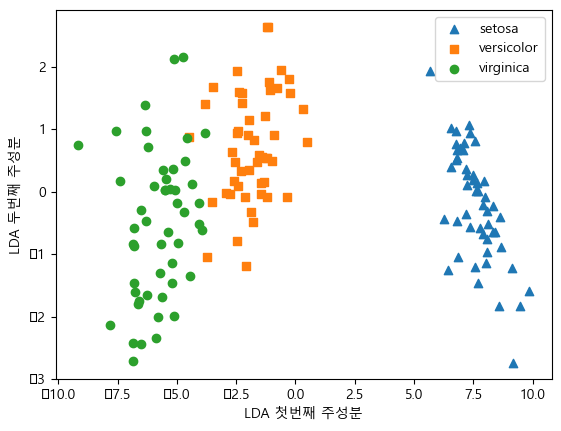

In [63]:
# 시각화
for i, marker in enumerate(markers):
    X_data = irislda_df[irislda_df['target']==i]['lda_component_1']                 # 첫 번째 주성분
    y_data = irislda_df[irislda_df['target']==i]['lda_component_2']                 # 두 번째 주성분
    plt.scatter(X_data, y_data, marker=marker, label=iris_data.target_names[i])     # 클래스별 산점도
    
plt.legend()
plt.xlabel('LDA 첫번째 주성분')
plt.ylabel('LDA 두번째 주성분')
plt.show()

### LDA로 축소한 결과가 pca로 축소한 결과보다 클래스간 분리가 더 뚜렷하게 나타났다.

### ============ 새로운 데이터셋으로 차원축소 진행한다. ============

In [64]:
import pandas as pd

df = pd.read_excel(
    'data/pca_credit_card.xls'          # 신용카드 데이터 파일
    , header = 1                        
    , sheet_name='Data'
)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [65]:
df.info()       # 데이터 구조 및 컬럼 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [66]:
df.rename(
    columns={'PAY_0':'PAY_1', 'default payment next month': 'default'},
    inplace=True
)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### 단변량(일변량), 다변량 
    - 일변량 : 각 컬럼의 분포 및 이상 여부 확인
    - 다변량 : 변수 간 상관관계 분석

In [67]:
# 분석에 상관없는 ID 컬럼 제거
df.drop('ID', axis=1, inplace=True)     
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [68]:
# X_data, y_data 나누기
X_data = df.drop('default', axis=1) # 입력특성 X
X_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [69]:
y_data = df['default']
y_data

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


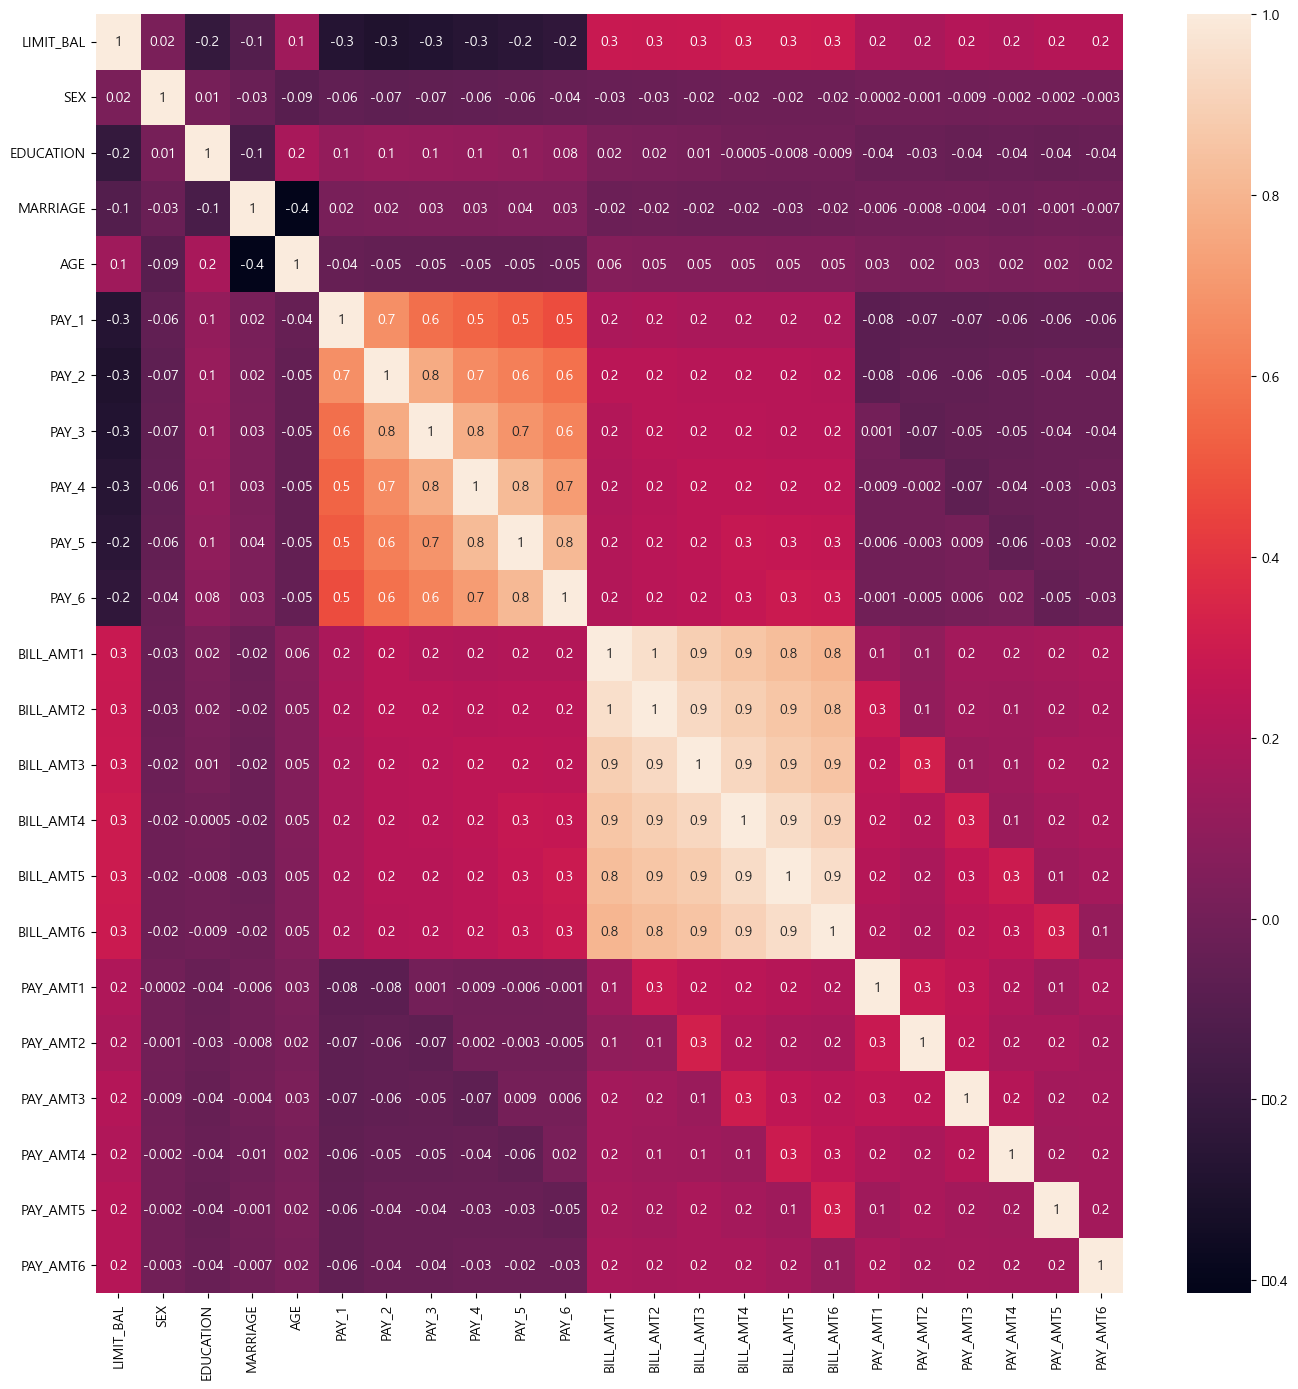

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
# 피어슨 상관계수 : 1, -1 가까울수록 강한 상관관계 0에 가까울 수록 상관관계가 없다.
corr = X_data.corr()

plt.figure(figsize=(14,14))
sns.heatmap(
    corr            # 상관관계
    , annot=True    # 내부값 표시
    , fmt='.1g'     # 유효숫자
)
plt.tight_layout()
plt.show()


### BILL_AMT1 ~ BILL_AMT6는 강한 상관관계를 가지고 있어 차원축소(PCA 등)을 적용하면 성능이 개선될 가능성이 있다.

In [87]:
X_data.iloc[:,11:17]    # 상관관계가 높은 컬럼들 ->

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [88]:
# 차원축소 전 데이터 스케일링
from sklearn.decomposition import PCA    # 차원 축소 도구
from sklearn.preprocessing import StandardScaler    # 표준화 도구

scaler = StandardScaler()       # 스케일러 객체 생성
scaler.fit(X_data.iloc[:,11:17])    # 차원축소 대상 컬럼 기준으로 학습
X_scaled = scaler.transform(X_data.iloc[:, 11:17])  # 데이터 표준화

X_scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]], shape=(30000, 6))

In [91]:
# 6개 특성을 2개 주성분으로 차원 축소
pca = PCA(n_components=2)           # 2차원으로 축소
pca.fit(X_scaled)                   # 주성분 학습
X_pca = pca.transform(X_scaled)     # 차원 축소 적용
# 앞 두줄은 X_pca = pca.fit_transform(X_scaled)와 동일하다.
X_pca

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       ...,
       [-1.19551872, -0.3595072 ],
       [-0.00829343, -0.04995798],
       [-0.25828552,  0.26525237]], shape=(30000, 2))

In [92]:
pca.explained_variance_ratio_ # 각 주성분이 설명하는 분산 비율

array([0.90555253, 0.0509867 ])

<div style="text-align: center; ">
    6개 -> 2개 차원으로 축소했을 떄 전체 분산의 약 95%를 설명.<br>   
    분산 비율이 너무 낮으면 차원 축소로 인해 성능이 저하될 가능성이 있다.
</div>

In [95]:
# 차원 축소 전 vs 후 성능 비교
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 차원 축소 전
X_train, X_test, y_train, y_test = train_test_split(
    X_data.iloc[:,11:17],   # 차원축소 전 원본 특성
    y_data,                 # 타겟변수
    test_size=0.2,          # 테스트 데이터 비율
    random_state=42
)

model = LogisticRegression(max_iter=1000)       # 로지스틱 회귀 모델(반복횟수 1000)
model.fit(X_train, y_train)                     # 테스트 데이터 학습
pred = model.predict(X_test)                    # 예측

accuracy_score(y_test,pred)                     # 차원 축소 전 성능



0.7811666666666667

In [97]:
# 차원 축소 후
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca,   # 차원축소 전 원본 특성
    y_data,                 # 타겟변수
    test_size=0.2,          # 테스트 데이터 비율
    random_state=42
)

model.fit(X_train_pca, y_train)                     # PCA 적용 데이터로 모델 학습
pred_pca = model.predict(X_test_pca)                # 예측

accuracy_score(y_test,pred_pca)                     # 차원 축소 전 성능



0.7811666666666667

차원 축소를 해서 성능이 올라갈 수도 있고, 내려갈 수도 있다.

In [99]:
pca.explained_variance_ratio_.sum()

np.float64(0.9565392265910996)

In [ ]:
# 전 후 예측값이 완전히 같은지 확인
(pred == pred_pca).mean()   # 1이 나오면 예측값이 완전히 동일하다.
